**TASK:**

Train the classifier with DecisionTreeClassifier

Complete all stages (training, graphical analysis, new features....)

Optional: compare with LogisticRegression and metric model



In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer

from pandas.api.types import is_object_dtype

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder

from sklearn.impute import SimpleImputer


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

# Load data

In [3]:
#create num list
int= np.arange(1,17)

#create column names
column_names = []

#make clolumn names list
for i in int:
  column_names.append(f"A{i}")

In [4]:
# load data

data = pd.read_csv("/content/drive/MyDrive/Hillel_ML_Course/8/crx.data",
                                                             names=column_names)

In [5]:
scaler = StandardScaler()

In [6]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [8]:
# check for nan values
data.isna().sum()

,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0
A10,0


#Exploatory data analysys

In [9]:
#list with object type columns
object_columns = []

for column in data.columns:
  if is_object_dtype(data[column]):
    object_columns.append(column)

print(object_columns)

['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A14', 'A16']


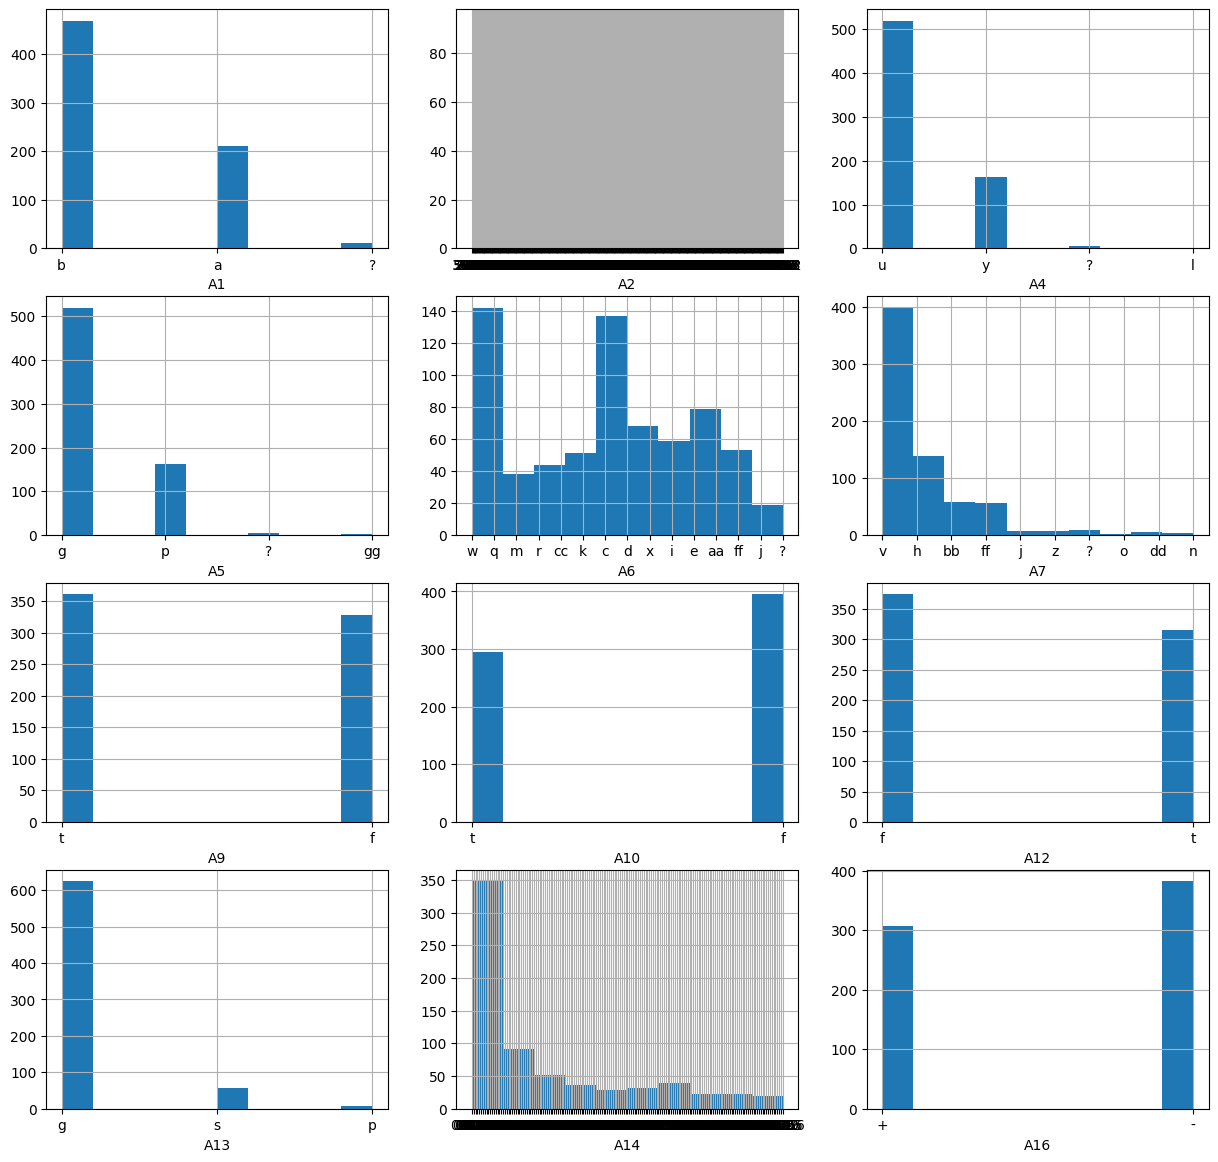

In [10]:
# let's see how much unique values in data
plt.figure(figsize=[15,18])

n=1
for column in object_columns:
  plt.subplot(5,3,n)
  data[column].hist()
  plt.xlabel(column)
  n+=1
# plt.tight_layout()
plt.show()

**Conclusion:**

on prevous plot i see, that value with symbol "?" hasn't many values, and it really may be unknown data. and it can be filtered.

data in columns A14 and A2  must plot i another kind to see better values

target has balance and this is good

columns A9, A10, A12 have almost similear data, and need to observe better


In [11]:
# check values in columns A9, A10, A12
data["A9"].value_counts(), data["A10"].value_counts(), data["A12"].value_counts()

(A9
 t    361
 f    329
 Name: count, dtype: int64,
 A10
 f    395
 t    295
 Name: count, dtype: int64,
 A12
 f    374
 t    316
 Name: count, dtype: int64)

Columns have different data , despite thet looks seems in the chart

In [12]:
# describe columns A2, A14

data["A2"].describe(), data["A14"].describe()

(count     690
 unique    350
 top         ?
 freq       12
 Name: A2, dtype: object,
 count       690
 unique      171
 top       00000
 freq        132
 Name: A14, dtype: object)

as we see unknown values are changed by ? and 00000 values

In [13]:
data["A2"].isin(["?"]).value_counts()

,count
A2,
False,678
True,12


let's see how much data equal to  ?

In [14]:
#create list columns with symbol ?
q_symb_list = []

# check any columns for ? symb and pass this column to list

for column in object_columns:
  if data[column].isin(["?"]).any():
    q_symb_list.append(column)

#print out columns wich symbol ?

print("columns with symbol ?:", q_symb_list)

columns with symbol ?: ['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A14']


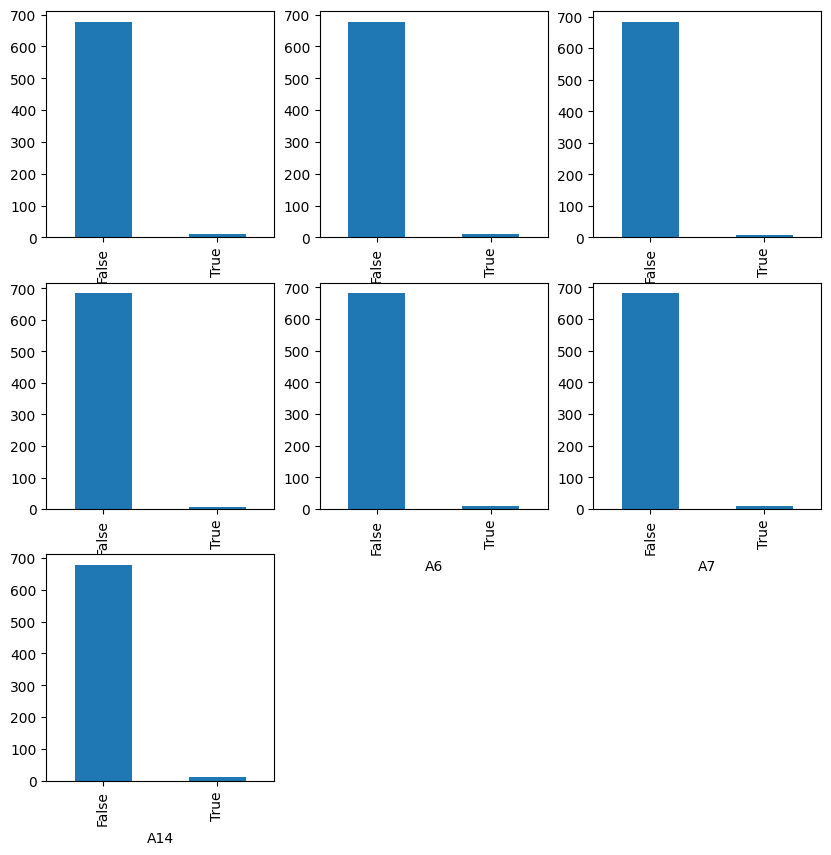

In [15]:
#define size of plot
plt.figure(figsize=[10,10])

n=1

for i in q_symb_list:
  plt.subplot(3,3,n)
  plot_column = data[i]=="?"
  plot_column.value_counts().plot(kind="bar")


  n+=1

plt.show()

Not many data with symbol ?, but it is not looks equal, let's observe more

In [16]:
data[data["A14"] == "00000"]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
12,a,38.25,6.000,u,g,k,v,1.000,t,f,0,t,g,00000,0,+
13,b,48.08,6.040,u,g,k,v,0.040,f,f,0,f,g,00000,2690,+
14,a,45.83,10.500,u,g,q,v,5.000,t,t,7,t,g,00000,0,+
18,b,21.83,0.250,u,g,d,h,0.665,t,f,0,t,g,00000,0,+
22,a,47.75,8.000,u,g,c,v,7.875,t,t,6,t,g,00000,1260,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,b,31.83,0.040,y,p,m,v,0.040,f,f,0,f,g,00000,0,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [17]:
data["A14"].isin(["00000"]).value_counts()

,count
A14,
False,558
True,132


<Axes: xlabel='A14'>

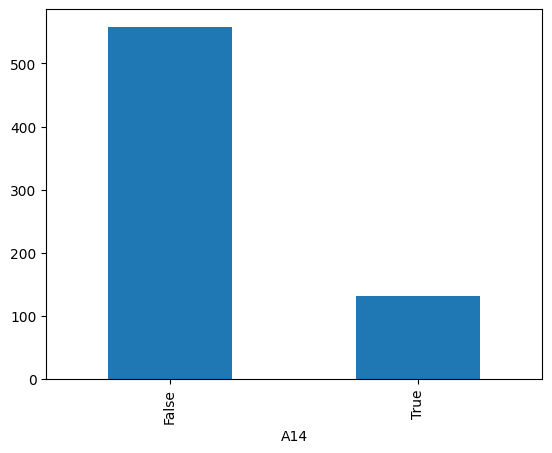

In [18]:
data["A14"].isin(["00000"]).value_counts().plot(kind="bar")

In this column : A14 the "00000" values to mutch, so in feature we need to use imput technic

<Axes: xlabel='A8'>

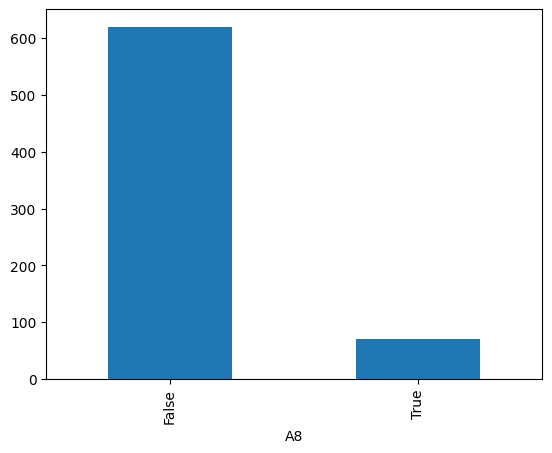

In [19]:
(data["A8"]<0.001).value_counts().plot(kind="bar")

In column A8  data with 0 values many values too

##discover tables

In [20]:
q_symb_list

['A1', 'A2', 'A4', 'A5', 'A6', 'A7', 'A14']

In [21]:
data[data["A2"] == "?"].head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
254,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-


In [22]:
data[data["A1"] == "?"]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
248,?,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
327,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,01160,0,-
346,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,00372,122,-
374,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,00260,1004,-
453,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,00300,0,-
479,?,26.50,2.710,y,p,?,?,0.085,f,f,0,f,s,00080,0,-
489,?,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,00263,0,-
520,?,20.42,7.500,u,g,k,v,1.500,t,t,1,f,g,00160,234,+
598,?,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,00240,768,+
601,?,42.25,1.750,y,p,?,?,0.000,f,f,0,t,g,00150,1,-


In [23]:
data[data["A4"] == "?"]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
270,b,37.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
330,b,20.42,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,-
456,b,34.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,-
592,b,23.17,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
622,a,25.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+


In [24]:
data[data["A7"] == "?"]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,+
270,b,37.58,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,+
330,b,20.42,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,-
456,b,34.58,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,-
479,?,26.50,2.71,y,p,?,?,0.085,f,f,0,f,s,00080,0,-
539,b,80.25,5.50,u,g,?,?,0.540,t,f,0,f,g,00000,340,-
592,b,23.17,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,+
601,?,42.25,1.75,y,p,?,?,0.000,f,f,0,t,g,00150,1,-
622,a,25.58,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,+


In [25]:
data[data["A14"] == "?"]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,+
206,a,71.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,+
270,b,37.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,?,0,-
330,b,20.42,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,-
406,a,40.33,8.125,y,p,k,v,0.165,f,t,2,f,g,?,18,-
445,a,?,11.250,u,g,ff,ff,0.000,f,f,0,f,g,?,5200,-
456,b,34.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,-


In [26]:
data[(data =="?").any(axis=1)].shape

(37, 16)

as we see unknown data with ? in sum 37 values. but else we have data wich inserted by values 00000 and 0.000 let see it

before next observation i need to convert object data to NAN , copy and drop it

In [27]:
#create a copy
copy_nan_symb = data[(data =="?").any(axis=1)]

In [28]:
# rename all ? to nan
data_nan = data.replace({"?": np.nan})

In [29]:
#drop nan
data_nan = data_nan.dropna(axis=0).copy()

In [30]:
#change target + to 1 and - to 0

data_nan = data_nan.replace({"+":1, "-":0}).copy()

<ipython-input-30-c0acd38c076e>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_nan = data_nan.replace({"+":1, "-":0}).copy()


In [31]:
data_nan.shape

(653, 16)

In [32]:
data_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    object 
 1   A2      653 non-null    object 
 2   A3      653 non-null    float64
 3   A4      653 non-null    object 
 4   A5      653 non-null    object 
 5   A6      653 non-null    object 
 6   A7      653 non-null    object 
 7   A8      653 non-null    float64
 8   A9      653 non-null    object 
 9   A10     653 non-null    object 
 10  A11     653 non-null    int64  
 11  A12     653 non-null    object 
 12  A13     653 non-null    object 
 13  A14     653 non-null    object 
 14  A15     653 non-null    int64  
 15  A16     653 non-null    int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 86.7+ KB


In [33]:
from pandas.api.types import is_integer_dtype
from pandas.api.types import is_float_dtype
#create integer list
data_int = []
#create float list
data_float = []
#check all columns for int and append it to list
for column in data_nan.columns:
  if is_integer_dtype(data_nan[column]):
    data_int.append(column)
  if is_float_dtype(data_nan[column]):
    data_float.append(column)

print("the int column list:", data_int, "the float list:", data_float)

the int column list: ['A11', 'A15', 'A16'] the float list: ['A3', 'A8']


In [34]:
data_nan[(data_nan[data_float]<=0.0001).any(axis=1)]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,1
53,b,34.92,2.500,u,g,w,v,0.000,t,f,0,t,g,00239,200,1
56,b,23.17,0.000,u,g,cc,v,0.085,t,f,0,f,g,00000,0,1
80,b,49.58,19.000,u,g,ff,ff,0.000,t,t,1,f,g,00094,0,0
89,a,49.00,1.500,u,g,j,j,0.000,t,f,0,t,g,00100,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,b,32.42,2.165,y,p,k,ff,0.000,f,f,0,f,g,00120,0,0
649,a,35.17,3.750,u,g,ff,ff,0.000,f,t,6,f,g,00000,200,0
655,a,21.08,5.000,y,p,ff,ff,0.000,f,f,0,f,g,00000,0,0
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,0


In [35]:
# check again column A14
data_nan["A14"].describe()

,A14
count,653
unique,164
top,00000
freq,128


In [36]:
data_nan[(data_nan["A14"]=="00000")]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
12,a,38.25,6.000,u,g,k,v,1.000,t,f,0,t,g,00000,0,1
13,b,48.08,6.040,u,g,k,v,0.040,f,f,0,f,g,00000,2690,1
14,a,45.83,10.500,u,g,q,v,5.000,t,t,7,t,g,00000,0,1
18,b,21.83,0.250,u,g,d,h,0.665,t,f,0,t,g,00000,0,1
22,a,47.75,8.000,u,g,c,v,7.875,t,t,6,t,g,00000,1260,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,b,31.83,0.040,y,p,m,v,0.040,f,f,0,f,g,00000,0,0
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,0
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,0
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,0


In [37]:
data_nan[(data_nan[data_float]<=1).any(axis=1)]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,1
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,1
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,1
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,1
10,b,22.08,0.830,u,g,c,h,2.165,f,f,0,t,g,00128,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,0
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,0
683,b,36.42,0.750,y,p,d,v,0.585,f,f,0,f,g,00240,3,0
686,a,22.67,0.750,u,g,c,v,2.000,f,t,2,t,g,00200,394,0


In [38]:
ob_in_column_list = ["A2", "A3", "A8", "A11", "A14", "A15"]

In [39]:
# convert object columns to float type
for column in data_nan[ob_in_column_list]:
  print(column)
  if is_object_dtype(data_nan[column]):
    data_nan[column] = data_nan[column].astype("float32", errors="ignore")


A2
A3
A8
A11
A14
A15


<Axes: xlabel='A3'>

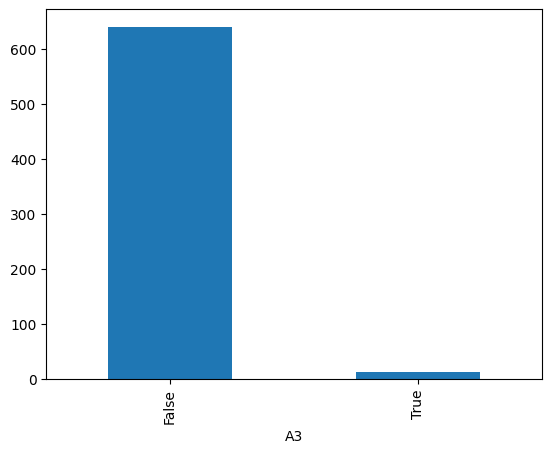

In [40]:
(data_nan["A3"]<0.001).value_counts().plot(kind="bar")

In [41]:
data_nan["A3"].describe()

,A3
count,653.000000
mean,4.829533
std,5.027077
min,0.000000
25%,1.040000
50%,2.835000
75%,7.500000
max,28.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x78f8095da800>,
 'caps': [<matplotlib.lines.Line2D at 0x78f8095dad40>,
 'boxes': [<matplotlib.lines.Line2D at 0x78f8095da560>],
 'medians': [<matplotlib.lines.Line2D at 0x78f8095db280>],
 'fliers': [<matplotlib.lines.Line2D at 0x78f8095db520>],
 'means': []}

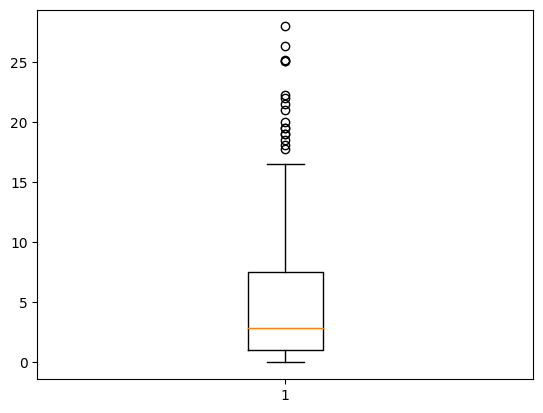

In [42]:
plt.boxplot(data_nan["A3"])

zero values in this column very small , but plot not bad, to raise accuracy we can filter data by quantile 85%

<Axes: xlabel='A8'>

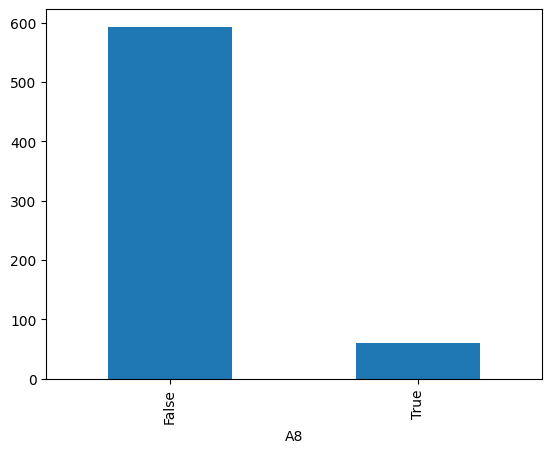

In [43]:
(data_nan["A8"]<0.001).value_counts().plot(kind="bar")

Here we see that zero values can be in this data like normal

In [44]:
data_nan["A8"].describe()

,A8
count,653.000000
mean,2.244296
std,3.371120
min,0.000000
25%,0.165000
50%,1.000000
75%,2.625000
max,28.500000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='A8'>

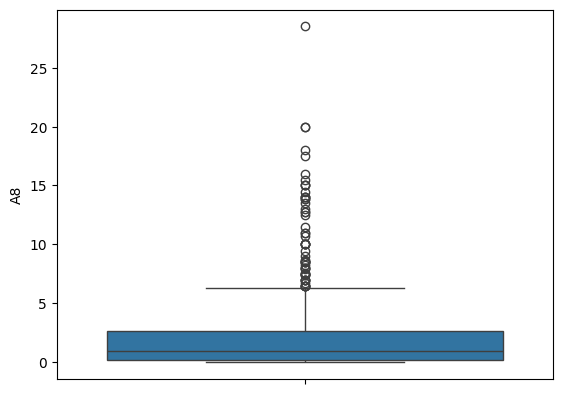

In [45]:
sns.boxplot(data_nan["A8"])

to raise accuracy in feature  we can filter data by quantile 85%


<Axes: xlabel='A15'>

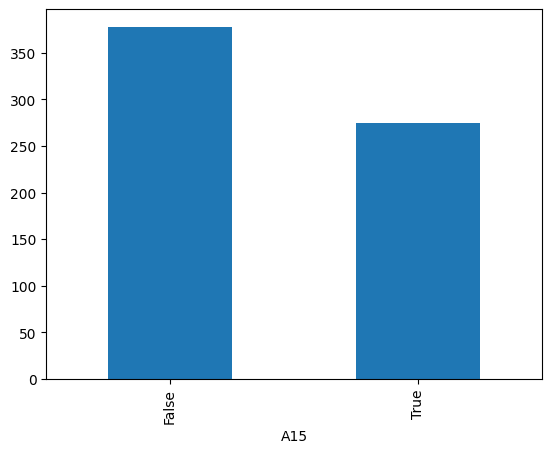

In [46]:
(data_nan["A15"]<0.001).value_counts().plot(kind="bar")

In [47]:
data_nan["A15"].describe()

,A15
count,653.000000
mean,1013.761103
std,5253.278504
min,0.000000
25%,0.000000
50%,5.000000
75%,400.000000
max,100000.000000


here 0 values are many, it can be valuable data, and i'll left it

{'whiskers': [<matplotlib.lines.Line2D at 0x78f809431c30>,
 'caps': [<matplotlib.lines.Line2D at 0x78f809432170>,
 'boxes': [<matplotlib.lines.Line2D at 0x78f809431990>],
 'medians': [<matplotlib.lines.Line2D at 0x78f8094326b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78f809432950>],
 'means': []}

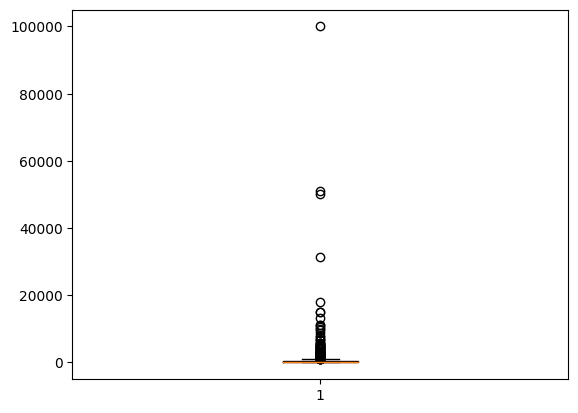

In [48]:
plt.boxplot(data_nan["A15"])

Here we see, that we can filter data all that more than 22000

In [49]:
data_nan["A15"].describe()

,A15
count,653.000000
mean,1013.761103
std,5253.278504
min,0.000000
25%,0.000000
50%,5.000000
75%,400.000000
max,100000.000000


In [50]:
data_nan[data_nan["A15"]==100000]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
317,b,17.5,22.0,l,gg,ff,o,0.0,f,f,0,t,p,450.0,100000,1


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='A14'>

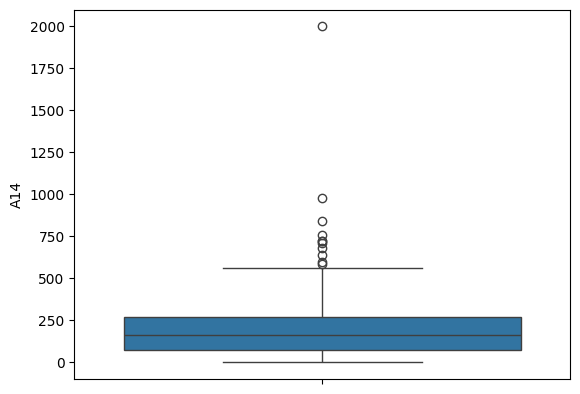

In [51]:
sns.boxplot(data_nan["A14"])

now data looks more clear. most data with values from 25 to 250, value 2000 looks like outlier

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='A2'>

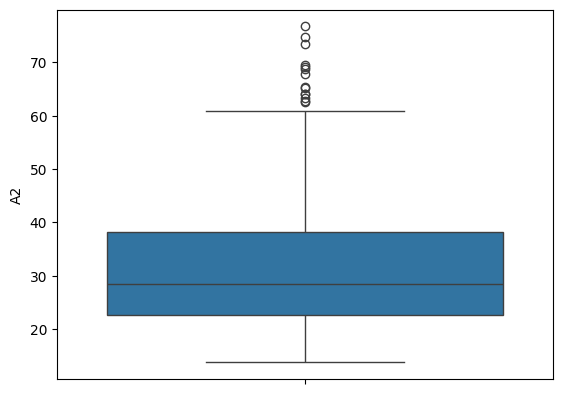

In [52]:
sns.boxplot(data_nan["A2"])

it looks like normal data distribution

In [53]:
data_nan["A2"].describe()

,A2
count,653.000000
mean,31.503813
std,11.838271
min,13.750000
25%,22.580000
50%,28.420000
75%,38.250000
max,76.750000


<Axes: xlabel='A3'>

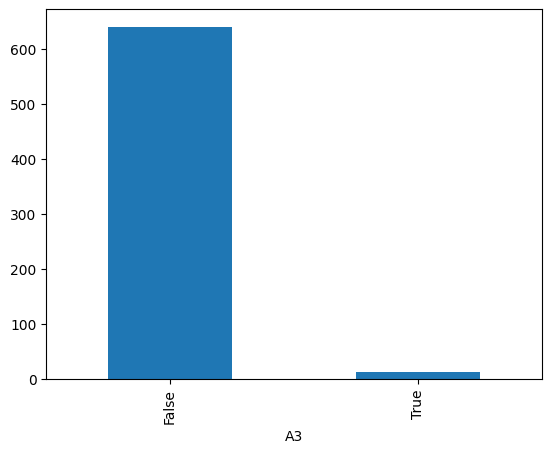

In [54]:
(data_nan["A3"]<0.001).value_counts().plot(kind="bar")

In [55]:
data_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    object 
 1   A2      653 non-null    float32
 2   A3      653 non-null    float64
 3   A4      653 non-null    object 
 4   A5      653 non-null    object 
 5   A6      653 non-null    object 
 6   A7      653 non-null    object 
 7   A8      653 non-null    float64
 8   A9      653 non-null    object 
 9   A10     653 non-null    object 
 10  A11     653 non-null    int64  
 11  A12     653 non-null    object 
 12  A13     653 non-null    object 
 13  A14     653 non-null    float32
 14  A15     653 non-null    int64  
 15  A16     653 non-null    int64  
dtypes: float32(2), float64(2), int64(3), object(9)
memory usage: 81.6+ KB


In [56]:
data_nan.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.830000,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.669998,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.500000,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.830000,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.170000,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [57]:
#create list with object data

data_nan_object = []

for column in data_nan.columns:
  if is_object_dtype(data_nan[column]):
    data_nan_object.append(column)

print(data_nan_object)

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']


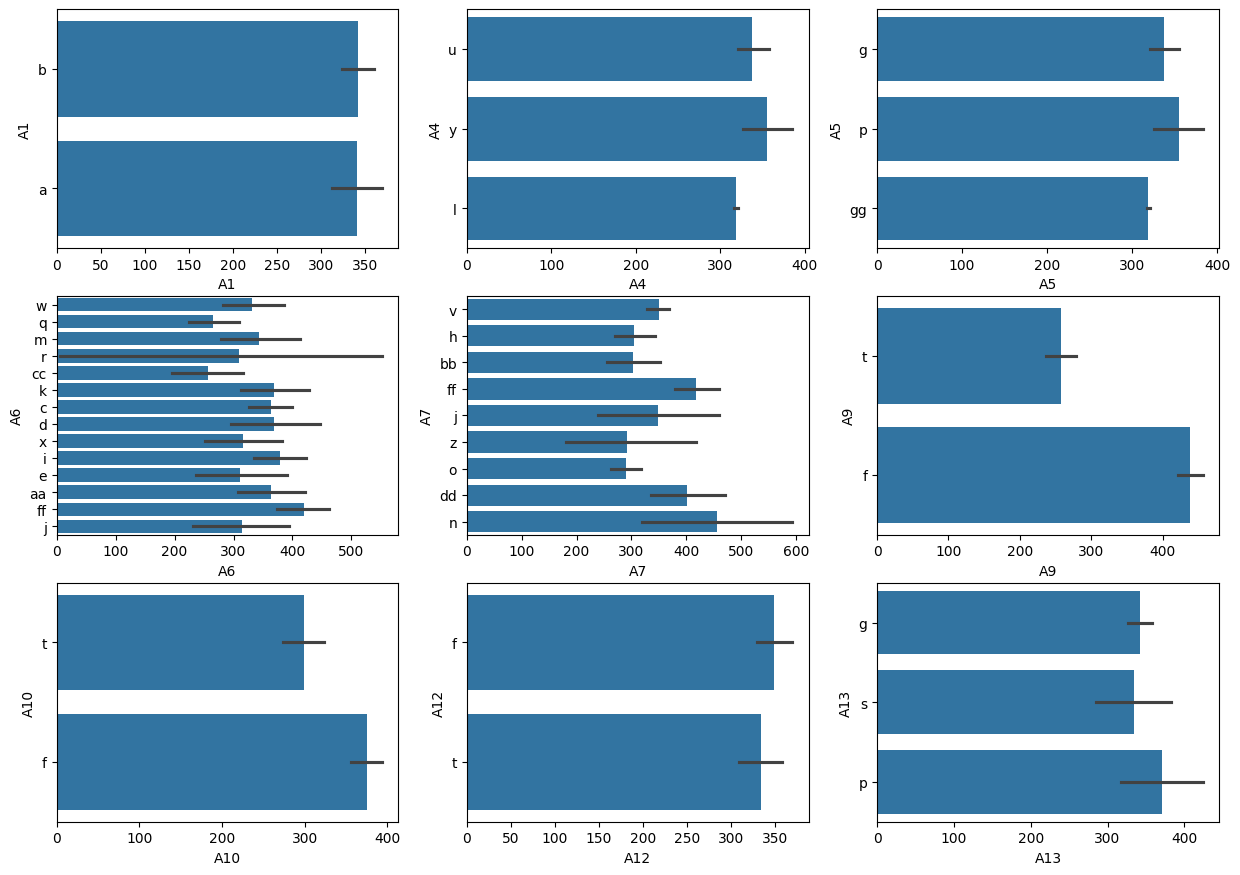

In [58]:
# let's see values in data_nan
plt.figure(figsize=[15,18])

n=1
for column in data_nan_object:
  plt.subplot(5,3,n)
  sns.barplot(data_nan[column])
  plt.xlabel(column)
  n+=1
# plt.tight_layout()
plt.show()

from this plot we can see that data in columns without anomalies

<Axes: ylabel='A4'>

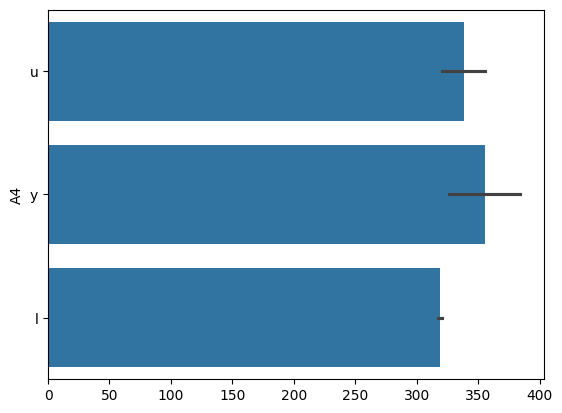

In [59]:
sns.barplot(data_nan["A4"])

## Conclusion:

from analysys i decide to:

1. as quantity of all data with symbol ? equal to 19 i can drop all

2. in column A14 many data "00000" so i'll left it, convert to nan and make impute, to better accuracy we can drop value 2000

3. Column A8 same manipulation like column A14

4. Column A3 : to raise accuracy in feature  we can filter data by quantile 85%

5. Column A15 we can filter data all that more than 22000




# Data preprocessing

Here i copy data to new variable without symbol "?". target data changed to boolian, object columns types with numbers converted to float and int type

In [60]:
# create new variable for data_nan
data_preproc = data_nan.copy()

In [61]:
data_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    object 
 1   A2      653 non-null    float32
 2   A3      653 non-null    float64
 3   A4      653 non-null    object 
 4   A5      653 non-null    object 
 5   A6      653 non-null    object 
 6   A7      653 non-null    object 
 7   A8      653 non-null    float64
 8   A9      653 non-null    object 
 9   A10     653 non-null    object 
 10  A11     653 non-null    int64  
 11  A12     653 non-null    object 
 12  A13     653 non-null    object 
 13  A14     653 non-null    float32
 14  A15     653 non-null    int64  
 15  A16     653 non-null    int64  
dtypes: float32(2), float64(2), int64(3), object(9)
memory usage: 81.6+ KB


In [62]:
data_preproc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.830000,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.669998,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.500000,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.830000,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.170000,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


## preprocess A14 column

i`ll made all 0 values in column np.nan and after chenge by simple imputer

In [63]:
#make all 0 values in column np.nan
data_preproc["A14"] = data_preproc["A14"].replace(0, np.nan)

In [64]:
#define simpleimputer
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")

In [65]:
# #change nan values to median value
imp_a14 = imp_median.fit_transform(data_preproc[["A14"]])

In [66]:
data_preproc["A14"] = imp_a14

In [67]:
# filter outlier
data_preproc = data_preproc[data_preproc["A14"]<2000]

In [68]:
data_preproc["A14"].describe()

,A14
count,652.000000
mean,213.102768
std,125.743767
min,17.000000
25%,132.000000
50%,181.000000
75%,269.000000
max,980.000000


##preprocess A15 column

In [69]:
#filter data
data_preproc = data_preproc[data_preproc["A15"]<22000]

In [70]:
data_preproc["A15"].describe()

,A15
count,648.000000
mean,662.961420
std,1881.139001
min,0.000000
25%,0.000000
50%,5.000000
75%,391.000000
max,18027.000000


# Feature engeneering

In [71]:
data_preproc.head(2)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.830000,0.00,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.669998,4.46,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1


In [72]:
#create data_eng

data_eng = data_preproc.copy()

In [73]:
# create a14/A2 column
data_eng["A14_2"] = data_eng["A14"] / data_eng["A2"]

# create a8/a3 column

data_eng["A8_3"] = data_eng["A8"] / data_eng["A3"]

#create A15^2 column
data_eng["A15_sqr"] = data_eng["A15"] * data_eng["A15"]


In [74]:
data_eng.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A14_2,A8_3,A15_sqr
0,b,30.830000,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1,6.552060,inf,0
1,a,58.669998,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1,0.732913,0.681614,313600
2,a,24.500000,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1,11.428572,3.000000,678976
3,b,27.830000,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1,3.593245,2.435065,9
4,b,20.170000,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1,5.949430,0.304000,0


## split into train test set

In [75]:
# split data into train, test, valid set

# split into train, valid set
data_test, data_valid = train_test_split(data_eng, train_size=0.9, shuffle=True,
                                         random_state=42)


In [76]:
#define valid data
X_valid = data_valid.drop(columns=["A16"], axis=0)
y_valid = data_valid["A16"]

In [77]:
#define features
X = data_test.drop(columns=["A16"], axis=0)
y = data_test["A16"]


In [78]:
#splt into train test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,
                                                    shuffle=True, random_state=42)

# Dec tree

In [79]:
dec_tree = DecisionTreeClassifier(random_state=42)

In [80]:
# decision tree parameters for gridsearch
dec_tree_params = { "max_depth" : np.arange(5,15,5),
                   "max_leaf_nodes": np.arange(3,9,3),
}

In [81]:
#transform catigorical data by target_encoder
dec_tree_col_tfmr = make_column_transformer((TargetEncoder(), data_nan_object))

In [82]:
dec_tree_col_tfmr

ColumnTransformer(transformers=[('targetencoder', TargetEncoder(),
                                 ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10',
                                  'A12', 'A13'])])

In [83]:
#make pipeline for decision tree classifier
dec_tree_pipeline = make_pipeline(dec_tree_col_tfmr, scaler, GridSearchCV(dec_tree,
                                              dec_tree_params, cv=5, refit=True))

In [84]:
#fit pipeline
dec_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('targetencoder',
                                                  TargetEncoder(),
                                                  ['A1', 'A4', 'A5', 'A6', 'A7',
                                                   'A9', 'A10', 'A12',
                                                   'A13'])])),
                ('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(random_state=42),
                              param_grid={'max_depth': array([ 5, 10]),
                                          'max_leaf_nodes': array([3, 6])}))])

## model evaluation

In [85]:
dec_tree_cv = cross_val_score(dec_tree_pipeline, X_train, y_train, cv=5)

print(f" the best cv scroe is: {dec_tree_cv.mean()}")

 the best cv scroe is: 0.8562571493937314


In [86]:
#looking for best parameters of gridsearch

grid_search = dec_tree_pipeline.named_steps['gridsearchcv']

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 5, 'max_leaf_nodes': 3}


In [87]:
#predict data
y_pred = dec_tree_pipeline.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        59
           1       0.89      0.93      0.91        58

    accuracy                           0.91       117
   macro avg       0.91      0.91      0.91       117
weighted avg       0.91      0.91      0.91       117



In [89]:
#validation data
y_pred_valid = dec_tree_pipeline.predict(X_valid)

##validation data

In [121]:
#validation classification report
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        39
           1       0.70      1.00      0.83        26

    accuracy                           0.83        65
   macro avg       0.85      0.86      0.83        65
weighted avg       0.88      0.83      0.83        65



#Logistic regression

In [91]:
lr = LogisticRegression(random_state=42)

In [92]:
# decision tree parameters for gridsearch
lr_params = { "max_iter" : np.arange(100,1000,100),
                   "penalty": ["l2"],
}

In [93]:
#transform catigorical data by target_encoder
lr_col_tfmr = make_column_transformer((TargetEncoder(), data_nan_object))

In [94]:
lr_col_tfmr

ColumnTransformer(transformers=[('targetencoder', TargetEncoder(),
                                 ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10',
                                  'A12', 'A13'])])

In [95]:
#make pipeline for decision tree classifier
lr_pipeline = make_pipeline(lr_col_tfmr, scaler, GridSearchCV(lr,
                                              lr_params, cv=5, refit=True))

In [96]:
#fit pipeline
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('targetencoder',
                                                  TargetEncoder(),
                                                  ['A1', 'A4', 'A5', 'A6', 'A7',
                                                   'A9', 'A10', 'A12',
                                                   'A13'])])),
                ('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(random_state=42),
                              param_grid={'max_iter': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                          'penalty': ['l2']}))])

## model evaluation

In [97]:
lr_cv = cross_val_score(lr_pipeline, X_train, y_train, cv=5)

print(f" the best cv scroe is: {lr_cv.mean()}")

 the best cv scroe is: 0.8605582246625486


In [98]:
#looking for best parameters of gridsearch

grid_search = lr_pipeline.named_steps['gridsearchcv']

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_iter': 100, 'penalty': 'l2'}


In [99]:
#predict data
y_pred_lr = lr_pipeline.predict(X_test)

In [108]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91        59
           1       0.90      0.91      0.91        58

    accuracy                           0.91       117
   macro avg       0.91      0.91      0.91       117
weighted avg       0.91      0.91      0.91       117



In [101]:
#validation data
y_pred_valid_lr = lr_pipeline.predict(X_valid)

##validation data

In [105]:
#validation classification report
print(classification_report(y_valid, y_pred_valid_lr))

              precision    recall  f1-score   support

           0       0.97      0.72      0.82        39
           1       0.69      0.96      0.81        26

    accuracy                           0.82        65
   macro avg       0.83      0.84      0.81        65
weighted avg       0.86      0.82      0.82        65



#Compare models reports

In [106]:
# trees report
#validation classification report
print(" "*20,"Decision tree classifier \n", "-"*60)
print(classification_report(y_valid, y_pred_valid))

                     Decision tree classifier 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        39
           1       0.70      1.00      0.83        26

    accuracy                           0.83        65
   macro avg       0.85      0.86      0.83        65
weighted avg       0.88      0.83      0.83        65



In [107]:
#validation logisti regression classification report
print(" "*20,"logistic regression \n", "-"*60)
print(classification_report(y_valid, y_pred_valid_lr))

                     logistic regression 
 ------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.72      0.82        39
           1       0.69      0.96      0.81        26

    accuracy                           0.82        65
   macro avg       0.83      0.84      0.81        65
weighted avg       0.86      0.82      0.82        65



#Conclusion

if compare 2 models with adjstment few hyperparameters the tree's model looks little bit better than logistic regression on this dataset

#trees on base data

In [109]:
X_base = data.drop(columns=["A16"])
y_base = data["A16"]


In [110]:
X_tr_base, X_test_base, y_tr_base, y_test_base = train_test_split(X_base, y_base, random_state=42)

In [ ]:
dec_tree = DecisionTreeClassifier(random_state=42)

In [111]:
#transform catigorical data by target_encoder
base_col_tfmr = make_column_transformer((TargetEncoder(), data_nan_object))

In [112]:
base_col_tfmr

ColumnTransformer(transformers=[('targetencoder', TargetEncoder(),
                                 ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10',
                                  'A12', 'A13'])])

In [113]:
#make pipeline for decision tree classifier
base_pipeline = make_pipeline(base_col_tfmr, scaler, GridSearchCV(dec_tree,
                                              dec_tree_params, cv=5, refit=True))

In [115]:
#fit pipeline
base_pipeline.fit(X_tr_base, y_tr_base)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('targetencoder',
                                                  TargetEncoder(),
                                                  ['A1', 'A4', 'A5', 'A6', 'A7',
                                                   'A9', 'A10', 'A12',
                                                   'A13'])])),
                ('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(random_state=42),
                              param_grid={'max_depth': array([ 5, 10]),
                                          'max_leaf_nodes': array([3, 6])}))])

## model evaluation

In [117]:
base_tree_cv = cross_val_score(base_pipeline, X_tr_base, y_tr_base, cv=5)

print(f" the best cv scroe is: {base_tree_cv.mean()}")

 the best cv scroe is: 0.8530619865571321


In [118]:
#looking for best parameters of gridsearch

grid_search = base_pipeline.named_steps['gridsearchcv']

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 5, 'max_leaf_nodes': 6}


In [119]:
#predict data
y_pred_base = base_pipeline.predict(X_test_base)

In [120]:
print(classification_report(y_test_base, y_pred_base))

              precision    recall  f1-score   support

           +       0.84      0.80      0.82        82
           -       0.83      0.86      0.84        91

    accuracy                           0.83       173
   macro avg       0.83      0.83      0.83       173
weighted avg       0.83      0.83      0.83       173

